### Sobhan Moradian Daghigh 

* 1-31-2023
* SML Final Project

In [828]:
# !pip install persiantools
# !pip install statsmodels --user

In [829]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from persiantools.jdatetime import JalaliDate
from scipy.stats import norm
import math
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from PIL import Image
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

### Loading Datas

In [830]:
iran_china_clay = pd.read_csv('./Datasets/Iran.China.Clay.csv')
iran_khodro = pd.read_csv('./Datasets/Iran.Khodro.csv')
s_mobarakeh_steel = pd.read_csv('./Datasets/S_Mobarakeh.Steel.csv')
social_sec_inv = pd.read_csv('./Datasets/Social.Sec.Inv.csv')
tose_atlas_mofid = pd.read_csv('./Datasets/ToseAtlasMofid.ETF.csv')
total_indices = pd.read_csv('./Datasets/Total_indices.csv')

datasets = [iran_china_clay, iran_khodro, s_mobarakeh_steel, social_sec_inv, tose_atlas_mofid, total_indices]
names = ['iran_china_clay', 'iran_khodro', 's_mobarakeh_steel', 'social_sec_inv', 'tose_atlas_mofid', 'total_indices']

In [831]:
iran_china_clay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <TICKER>      2983 non-null   object 
 1   <DTYYYYMMDD>  2983 non-null   int64  
 2   <FIRST>       2983 non-null   float64
 3   <HIGH>        2983 non-null   float64
 4   <LOW>         2983 non-null   float64
 5   <CLOSE>       2983 non-null   float64
 6   <VALUE>       2983 non-null   int64  
 7   <VOL>         2983 non-null   int64  
 8   <OPENINT>     2983 non-null   int64  
 9   <PER>         2983 non-null   object 
 10  <OPEN>        2983 non-null   float64
 11  <LAST>        2983 non-null   float64
dtypes: float64(6), int64(4), object(2)
memory usage: 279.8+ KB


In [832]:
iran_khodro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <TICKER>      4572 non-null   object 
 1   <DTYYYYMMDD>  4572 non-null   int64  
 2   <FIRST>       4572 non-null   float64
 3   <HIGH>        4572 non-null   float64
 4   <LOW>         4572 non-null   float64
 5   <CLOSE>       4572 non-null   float64
 6   <VALUE>       4572 non-null   int64  
 7   <VOL>         4572 non-null   int64  
 8   <OPENINT>     4572 non-null   int64  
 9   <PER>         4572 non-null   object 
 10  <OPEN>        4572 non-null   float64
 11  <LAST>        4572 non-null   float64
dtypes: float64(6), int64(4), object(2)
memory usage: 428.8+ KB


In [833]:
s_mobarakeh_steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3507 entries, 0 to 3506
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <TICKER>      3507 non-null   object 
 1   <DTYYYYMMDD>  3507 non-null   int64  
 2   <FIRST>       3507 non-null   float64
 3   <HIGH>        3507 non-null   float64
 4   <LOW>         3507 non-null   float64
 5   <CLOSE>       3507 non-null   float64
 6   <VALUE>       3507 non-null   int64  
 7   <VOL>         3507 non-null   int64  
 8   <OPENINT>     3507 non-null   int64  
 9   <PER>         3507 non-null   object 
 10  <OPEN>        3507 non-null   float64
 11  <LAST>        3507 non-null   float64
dtypes: float64(6), int64(4), object(2)
memory usage: 328.9+ KB


In [834]:
social_sec_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <TICKER>      547 non-null    object 
 1   <DTYYYYMMDD>  547 non-null    int64  
 2   <FIRST>       547 non-null    float64
 3   <HIGH>        547 non-null    float64
 4   <LOW>         547 non-null    float64
 5   <CLOSE>       547 non-null    float64
 6   <VALUE>       547 non-null    int64  
 7   <VOL>         547 non-null    int64  
 8   <OPENINT>     547 non-null    int64  
 9   <PER>         547 non-null    object 
 10  <OPEN>        547 non-null    float64
 11  <LAST>        547 non-null    float64
dtypes: float64(6), int64(4), object(2)
memory usage: 51.4+ KB


In [835]:
tose_atlas_mofid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <TICKER>      2085 non-null   object 
 1   <DTYYYYMMDD>  2085 non-null   int64  
 2   <FIRST>       2085 non-null   float64
 3   <HIGH>        2085 non-null   float64
 4   <LOW>         2085 non-null   float64
 5   <CLOSE>       2085 non-null   float64
 6   <VALUE>       2085 non-null   int64  
 7   <VOL>         2085 non-null   int64  
 8   <OPENINT>     2085 non-null   int64  
 9   <PER>         2085 non-null   object 
 10  <OPEN>        2085 non-null   float64
 11  <LAST>        2085 non-null   float64
dtypes: float64(6), int64(4), object(2)
memory usage: 195.6+ KB


In [836]:
total_indices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <DTYYYYMMDD>  690 non-null    object 
 1   <CLOSE>       690 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.9+ KB


### Convert Jalali dates to Gregorian for "total_indices" dataset

In [837]:
cnvs = []
for ele in total_indices.iterrows():
    temp = ele[1]['<DTYYYYMMDD>'].split('/')
    cnvs.append(int(JalaliDate(int(temp[0]), int(temp[1]), int(temp[2])).to_gregorian().strftime('%Y%m%d')))
total_indices['<DTYYYYMMDD>'] = cnvs
total_indices

,<DTYYYYMMDD>,<CLOSE>
0,20230130,1539679.610
1,20230129,1542190.690
2,20230128,1600083.660
3,20230125,1611955.890
4,20230124,1646053.520
...,...,...
685,20200330,547658.505
686,20200329,545649.374
687,20200328,532525.281
688,20200325,521267.671


### Filter last two years

In [838]:
def get_unique_dates(stocks):
    temp = [stock['<DTYYYYMMDD>'] for stock in stocks]
    intersect = list(set(temp[0]).intersection(*temp))
    intersect.sort()
    return intersect

def get_last_n_years(datasets, intersect, n=2, intersect_allow=False):
    # 20000 stands for two years
    filtered = []
    days = [x for x in intersect if x >= intersect[-1] - 20000]    
    for dataset in datasets:
        if intersect_allow:
            filtered.append(pd.DataFrame(dataset.loc[dataset['<DTYYYYMMDD>'].isin(days)]))
        else:
            filtered.append(dataset.loc[dataset['<DTYYYYMMDD>'] >= dataset.loc[0, '<DTYYYYMMDD>'] - 20000])
    return filtered

In [839]:
intersect = get_unique_dates(stocks=datasets)
[iran_china_clay, iran_khodro, s_mobarakeh_steel, social_sec_inv, tose_atlas_mofid, total_indices] = get_last_n_years(datasets, intersect, n=2)
datasets = [iran_china_clay, iran_khodro, s_mobarakeh_steel, social_sec_inv, tose_atlas_mofid, total_indices]

In [840]:
# For example
iran_china_clay

,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>
0,Iran.China.Clay,20230130,13950.0,13950.0,12920.0,13390.0,11241104520,848242,278,D,13590.0,13280.0
1,Iran.China.Clay,20230129,14290.0,14290.0,13580.0,13590.0,23948330970,1762501,227,D,14290.0,13580.0
2,Iran.China.Clay,20230128,14430.0,14600.0,14130.0,14290.0,27193111830,1902650,257,D,14870.0,14320.0
3,Iran.China.Clay,20230125,15480.0,15480.0,14310.0,14870.0,9138056240,623405,272,D,15040.0,14630.0
4,Iran.China.Clay,20230124,15100.0,15450.0,14850.0,15040.0,77890082770,5177631,313,D,14970.0,15350.0
...,...,...,...,...,...,...,...,...,...,...,...,...
458,Iran.China.Clay,20210203,45240.0,47160.0,44000.0,45590.0,10627284120,239310,220,D,45940.0,44050.0
459,Iran.China.Clay,20210202,46560.0,46560.0,43900.0,45940.0,4610053900,103022,92,D,46070.0,44850.0
460,Iran.China.Clay,20210201,47440.0,47440.0,45810.0,46070.0,45890417410,998029,396,D,48220.0,46630.0
461,Iran.China.Clay,20210131,50600.0,50600.0,46000.0,48220.0,11802033730,247616,282,D,48400.0,47000.0


#### Ready to lunch the JET ))

### Q 1.

In [841]:
#           pi - pi-1
#    ri =  ___________      ; pi = <CLOSE>
#             pi-1

In [842]:
def cal_returns(stock):
    lst = stock.loc[:, '<CLOSE>']
    returns = []
    for i in range(len(lst) - 1):
        returns.append((lst[i + 1] - lst[i]) / lst[i])
    return returns

In [843]:
def plotter(stock_returns, name, typee):
    with plt.style.context('seaborn'):
        plt.figure(figsize=(12, 8))
        x_axis = np.arange(-0.05, 0.05, 0.001)  
        if typee == 'hist':
            plt.hist(stock_returns, bins=100, density=True, alpha=0.9)
            plt.gca().set(title='Probability Histogram of <{}>'.format(name), ylabel='Frequency')
            
        elif typee == 'normal':
            plt.plot(x_axis, norm.pdf(x_axis, np.mean(total_indices_returns), np.std(total_indices_returns)))
            plt.gca().set(title='Probability Normal Distribution of <{}>'.format(name))
            
        elif typee == 'both':
            plt.hist(stock_returns, bins=100, density=True, alpha=0.9)
            plt.plot(x_axis, norm.pdf(x_axis, np.mean(total_indices_returns), np.std(total_indices_returns)), linewidth=3.0, c='r')
            plt.gca().set(title='<{}>'.format(name))
        plt.show()        

#### 1.A.

In [844]:
total_indices_returns = cal_returns(total_indices)

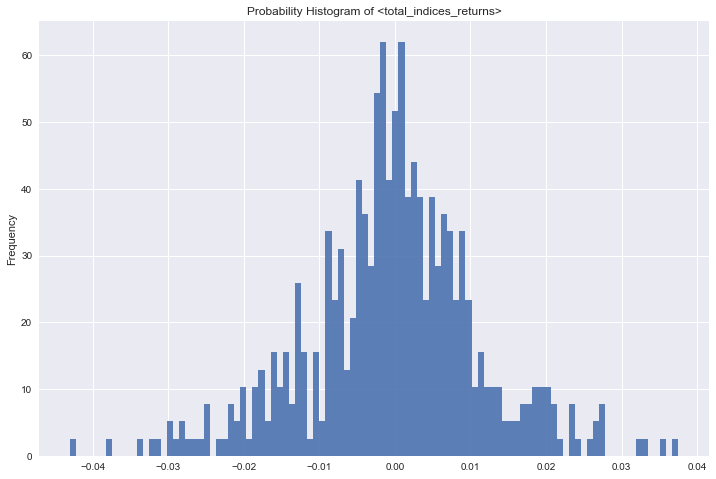

In [845]:
plotter(total_indices_returns, name='total_indices_returns', typee='hist')

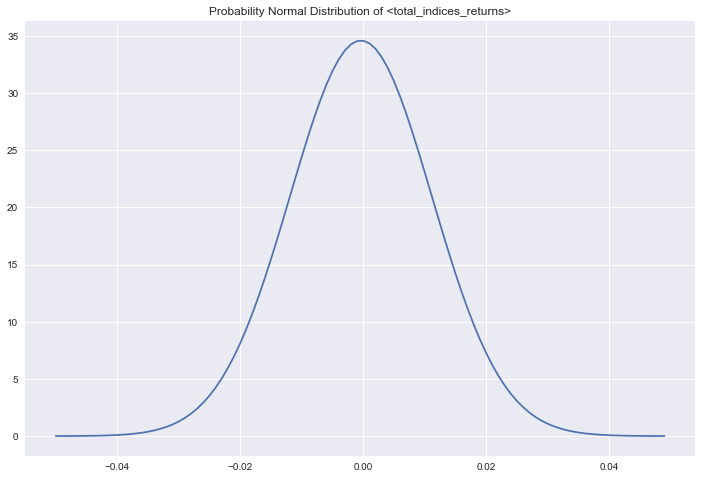

In [846]:
plotter(total_indices_returns, name='total_indices_returns', typee='normal')

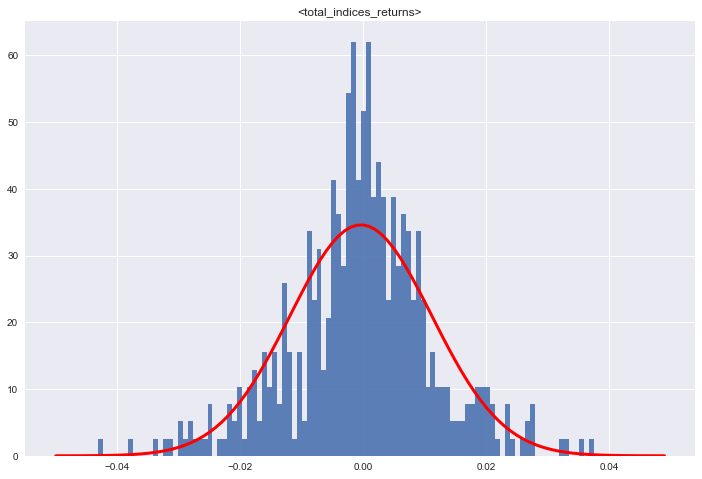

In [847]:
plotter(total_indices_returns, name='total_indices_returns', typee='both')

In [ ]:
# Part B is right after part C. 

#### 1.C.

In [850]:
iran_china_clay_returns = cal_returns(iran_china_clay)
iran_khodro_returns = cal_returns(iran_khodro)
s_mobarakeh_steel_returns = cal_returns(s_mobarakeh_steel)
social_sec_inv_returns = cal_returns(social_sec_inv)
tose_atlas_mofid_returns = cal_returns(tose_atlas_mofid)

datasets_returns = [iran_china_clay_returns, iran_khodro_returns, s_mobarakeh_steel_returns, social_sec_inv_returns, tose_atlas_mofid_returns, total_indices_returns]
[x.insert(0, 0) for x in datasets_returns]

[None, None, None, None, None, None]

In [851]:
iran_china_clay['<RETURN>'] = iran_china_clay_returns
iran_khodro['<RETURN>'] = iran_khodro_returns
s_mobarakeh_steel['<RETURN>'] = s_mobarakeh_steel_returns
social_sec_inv['<RETURN>'] = social_sec_inv_returns
tose_atlas_mofid['<RETURN>'] = tose_atlas_mofid_returns
total_indices['<RETURN>'] = total_indices_returns

In [852]:
iran_china_clay

,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>,<RETURN>
0,Iran.China.Clay,20230130,13950.0,13950.0,12920.0,13390.0,11241104520,848242,278,D,13590.0,13280.0,0.000000
1,Iran.China.Clay,20230129,14290.0,14290.0,13580.0,13590.0,23948330970,1762501,227,D,14290.0,13580.0,0.014937
2,Iran.China.Clay,20230128,14430.0,14600.0,14130.0,14290.0,27193111830,1902650,257,D,14870.0,14320.0,0.051508
3,Iran.China.Clay,20230125,15480.0,15480.0,14310.0,14870.0,9138056240,623405,272,D,15040.0,14630.0,0.040588
4,Iran.China.Clay,20230124,15100.0,15450.0,14850.0,15040.0,77890082770,5177631,313,D,14970.0,15350.0,0.011432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Iran.China.Clay,20210203,45240.0,47160.0,44000.0,45590.0,10627284120,239310,220,D,45940.0,44050.0,0.016273
459,Iran.China.Clay,20210202,46560.0,46560.0,43900.0,45940.0,4610053900,103022,92,D,46070.0,44850.0,0.007677
460,Iran.China.Clay,20210201,47440.0,47440.0,45810.0,46070.0,45890417410,998029,396,D,48220.0,46630.0,0.002830
461,Iran.China.Clay,20210131,50600.0,50600.0,46000.0,48220.0,11802033730,247616,282,D,48400.0,47000.0,0.046668


In [853]:
iran_china_clay_mean, iran_china_clay_var = np.mean(iran_china_clay_returns), np.var(iran_china_clay_returns)
iran_khodro_mean, iran_khodro_var = np.mean(iran_khodro_returns), np.var(iran_khodro_returns)
s_mobarakeh_steel_mean, s_mobarakeh_steel_var = np.mean(s_mobarakeh_steel_returns), np.var(s_mobarakeh_steel_returns)
social_sec_inv_mean, social_sec_inv_var = np.mean(social_sec_inv_returns), np.var(social_sec_inv_returns)
tose_atlas_mofid_mean, tose_atlas_mofid_var = np.mean(tose_atlas_mofid_returns), np.var(tose_atlas_mofid_returns)

x = [iran_china_clay_mean, iran_khodro_mean, s_mobarakeh_steel_mean, social_sec_inv_mean, tose_atlas_mofid_mean]
y = [iran_china_clay_var, iran_khodro_var, s_mobarakeh_steel_var, social_sec_inv_var, tose_atlas_mofid_var]

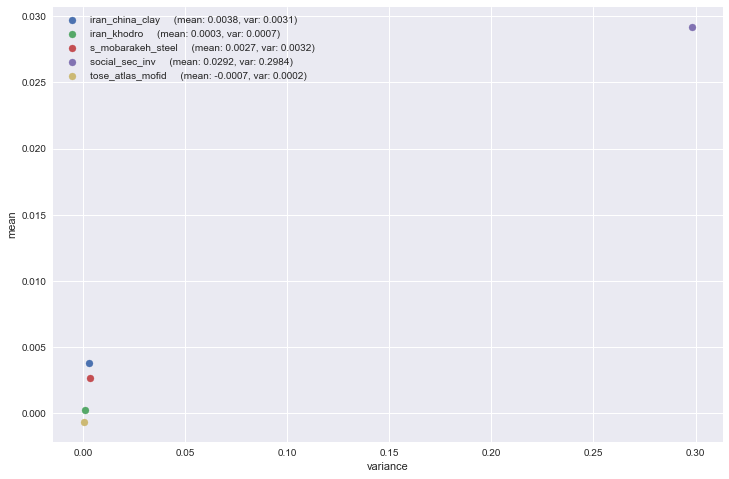

In [854]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(12, 8))
    for i, (ele1, ele2) in enumerate(zip(x, y)): 
        plt.scatter(ele2, ele1, label=names[i] + '     (mean: {:.4f}, var: {:.4f})'.format(ele1, ele2))
    plt.gca().set(title='', ylabel='mean', xlabel='variance')
    plt.legend()
    plt.show()

#### 1.B.

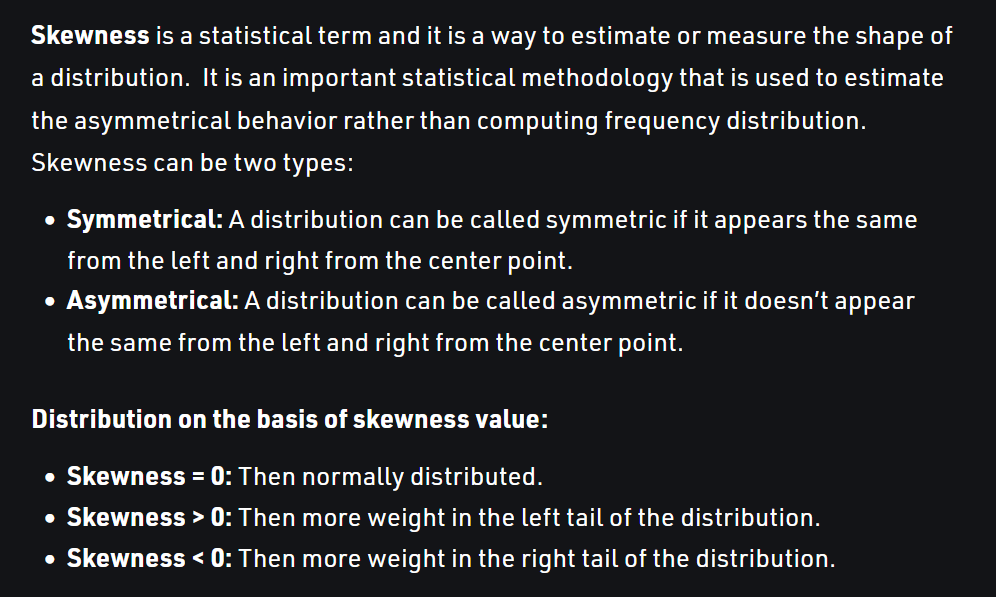

In [855]:
Image.open('./Datasets/Symmetrical.png')

In [856]:
print(skew(total_indices.loc[:, '<RETURN>'], axis=0, bias=True))

-0.14444545788157942


#### 1.D.

In [857]:
def get_days_group(start, end, window):
    lst = total_indices.loc[:, '<DTYYYYMMDD>']
    chunks = math.ceil(len(lst) / window)
    return np.array_split(lst, chunks)

In [872]:
windows = [10, 20, 50]
start = 20230130
end   = 20210130
all_means_window, all_vars_window = [], []
for window in windows:
    chunks = get_days_group(start, end, window)
    all_means, all_vars = [], []
    for stock in datasets:
        chunk_mean, chunk_var = [], []
        for chunk in chunks:
            lst = stock.loc[stock['<DTYYYYMMDD>'].isin(chunk)]['<RETURN>']
            if len(lst):
                mean, var = np.mean(lst), np.var(lst)
            else:
                mean, var = np.nan, np.nan
            chunk_mean.append(mean)
            chunk_var.append(var)
        all_means.append(chunk_mean)
        all_vars.append(chunk_var)
    all_means_window.append(all_means)
    all_vars_window.append(all_vars)

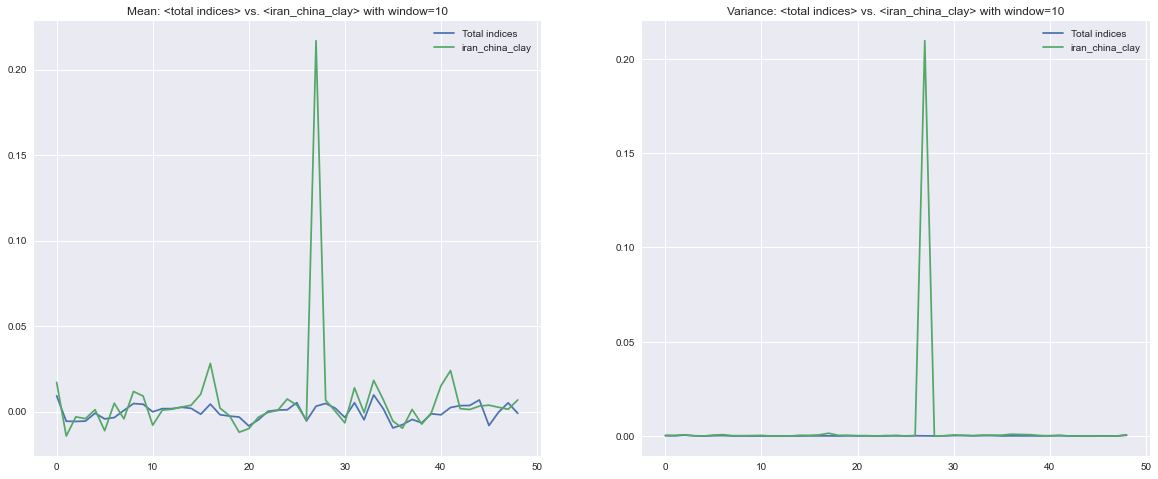

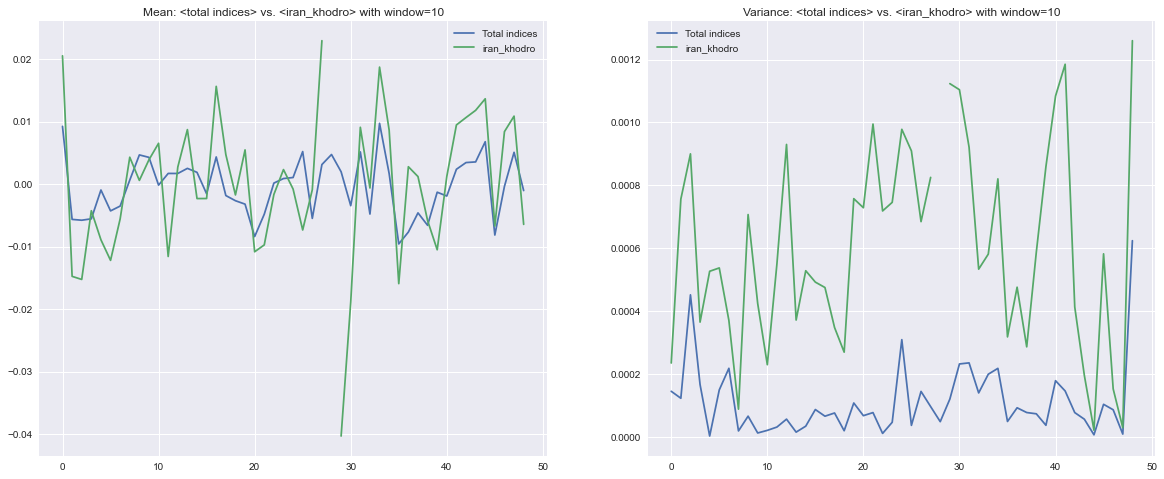

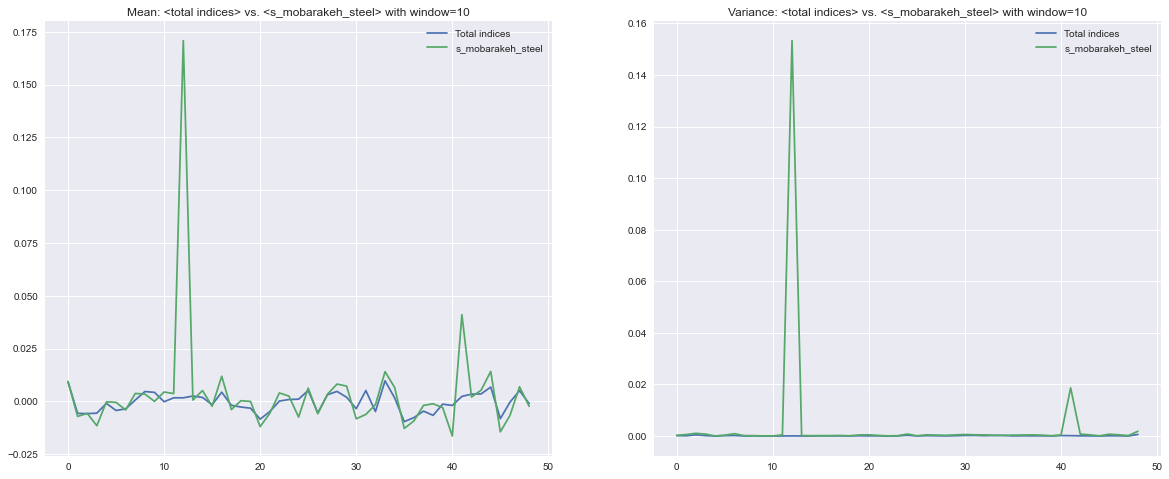

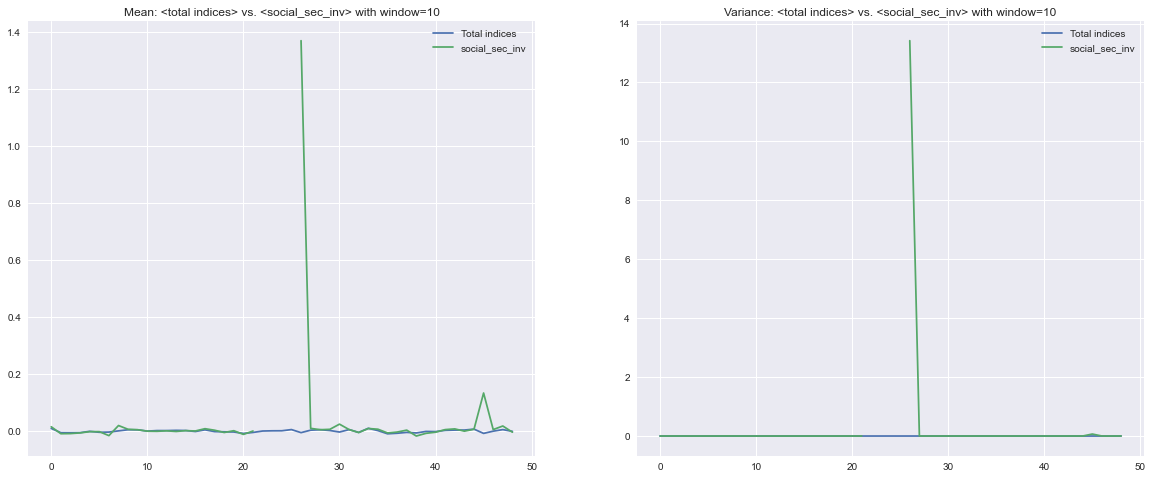

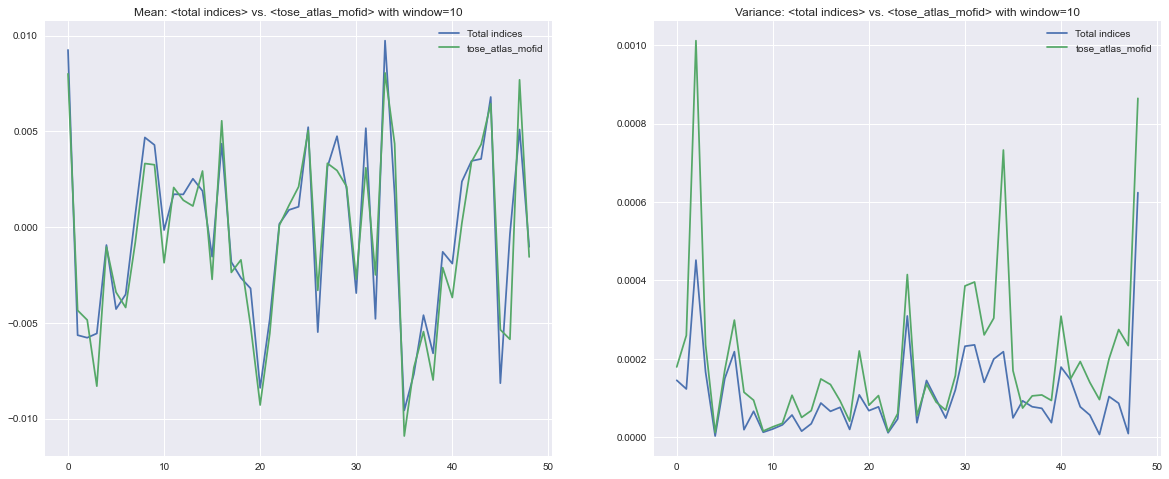

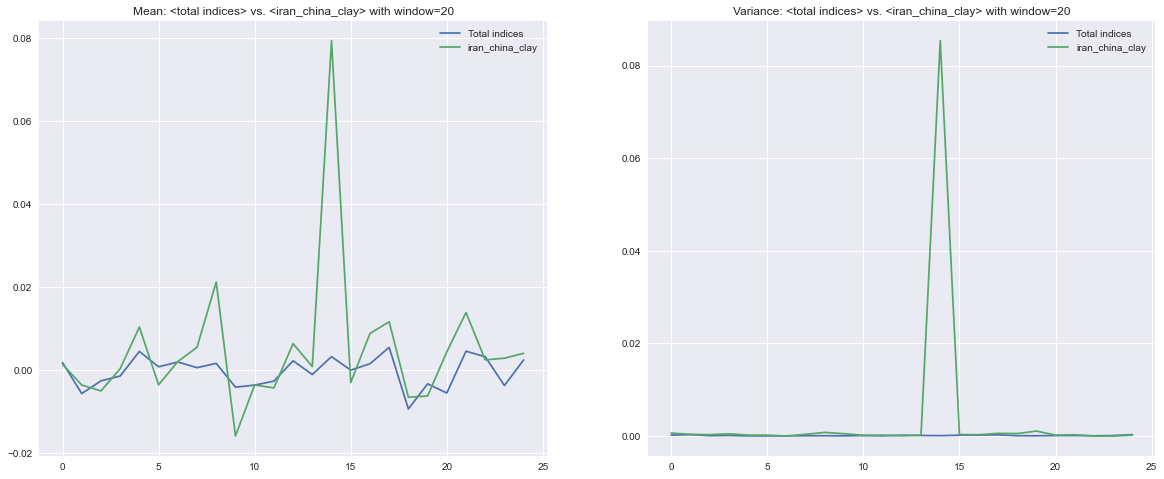

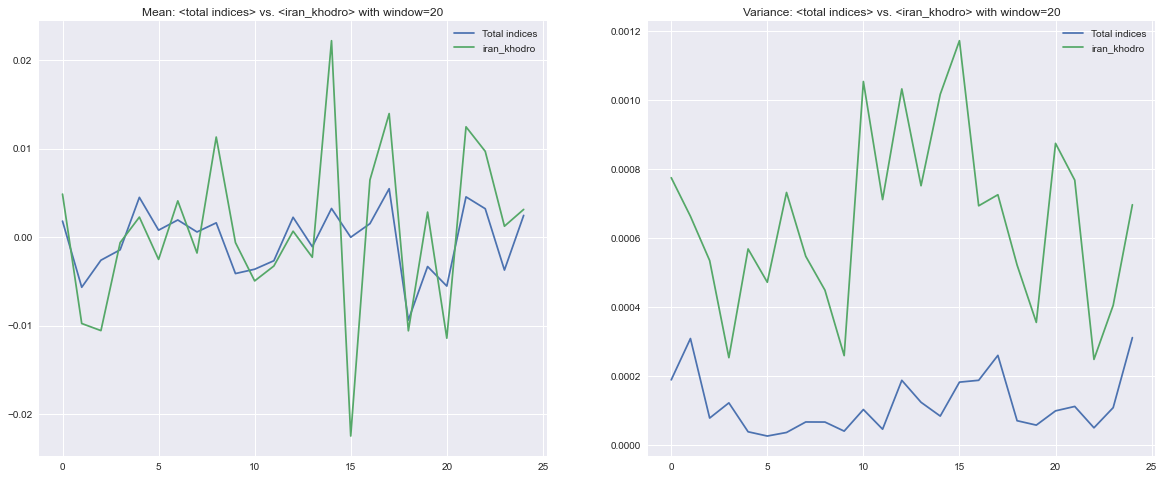

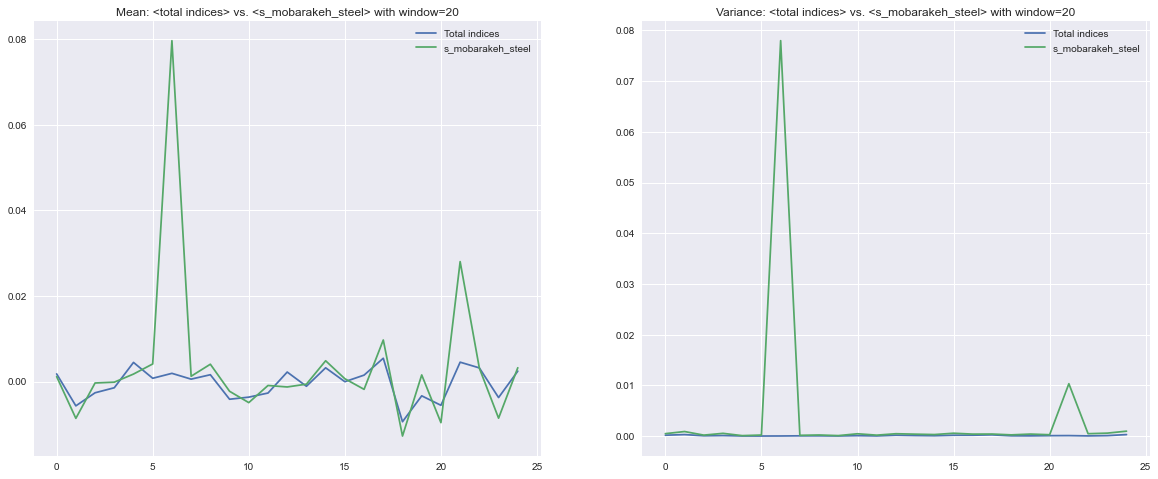

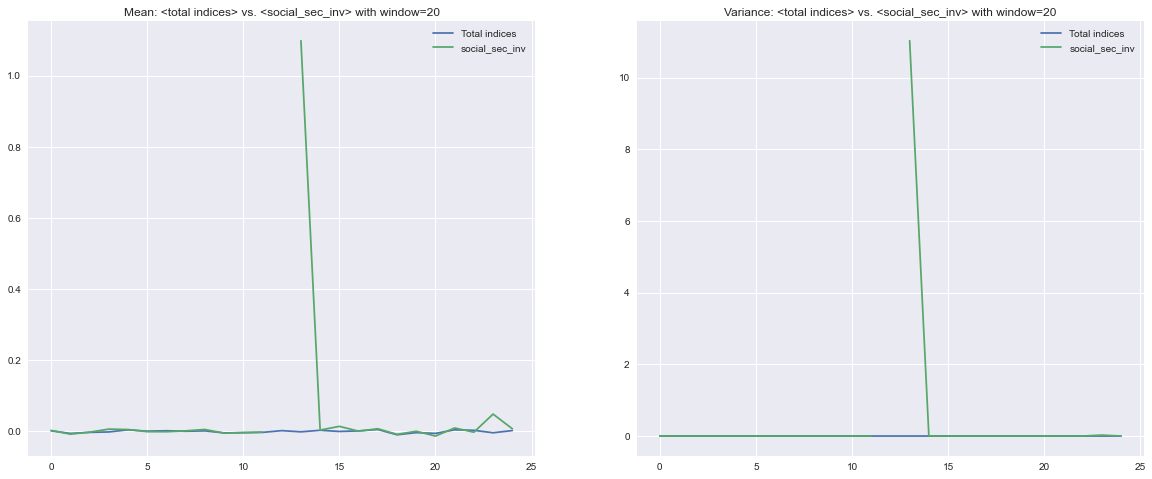

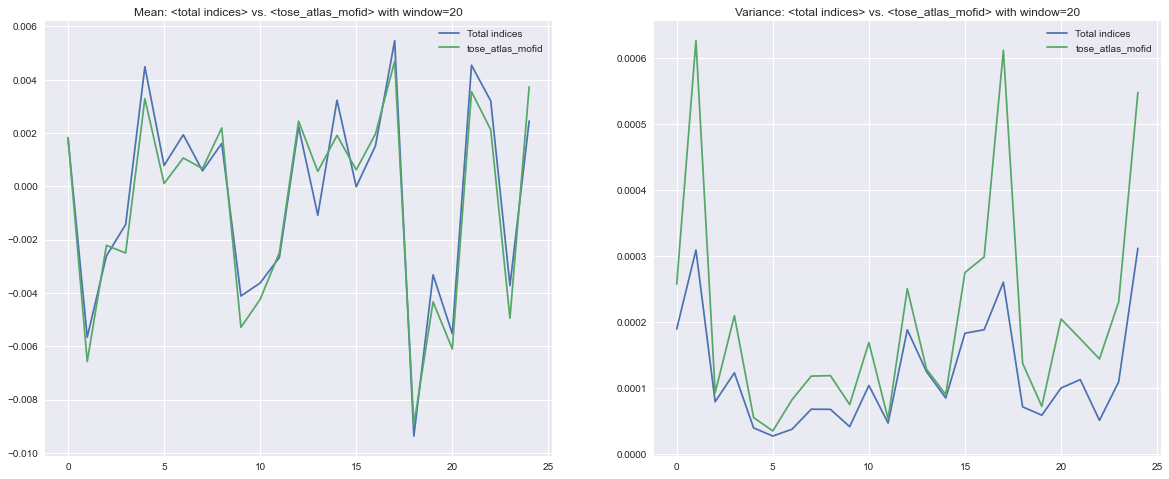

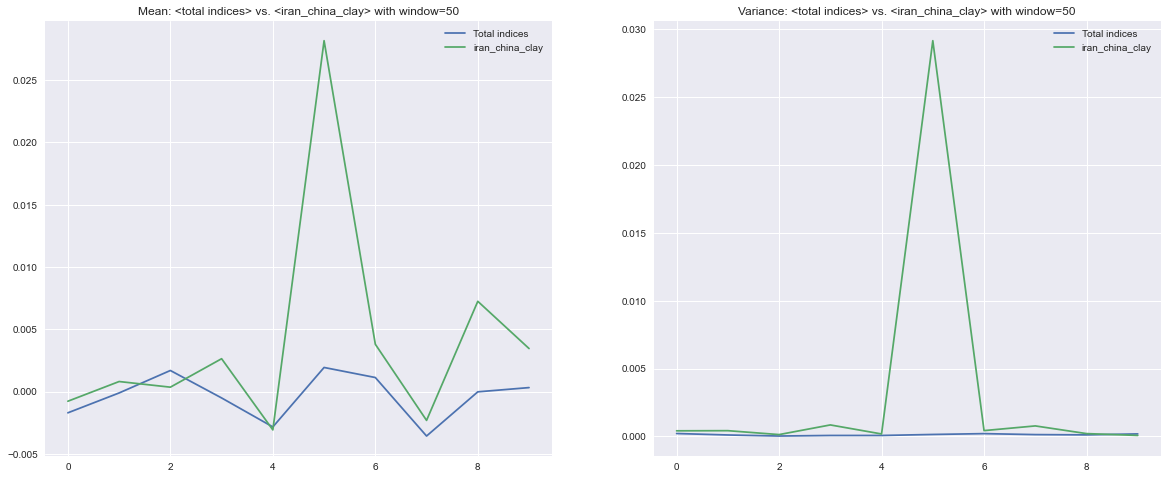

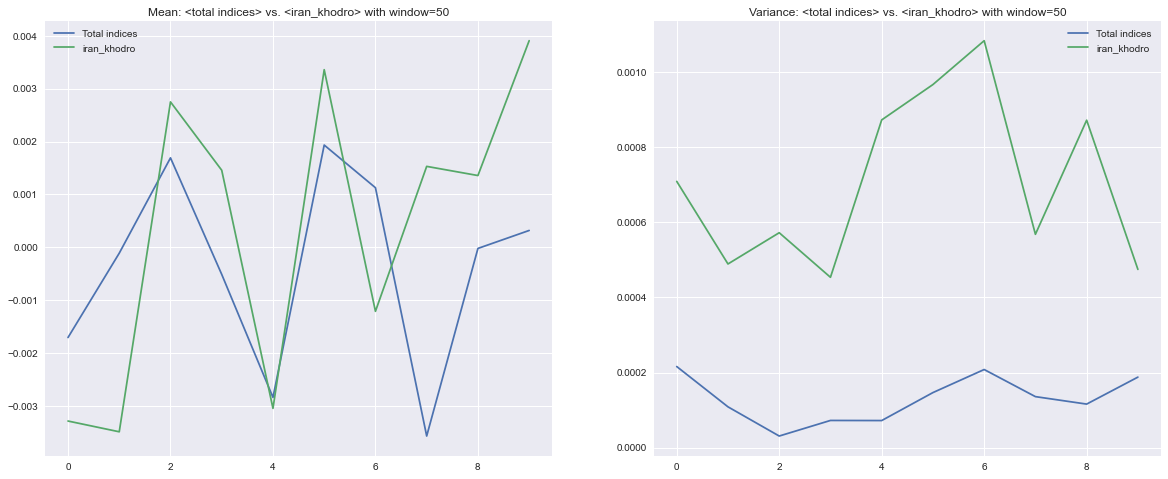

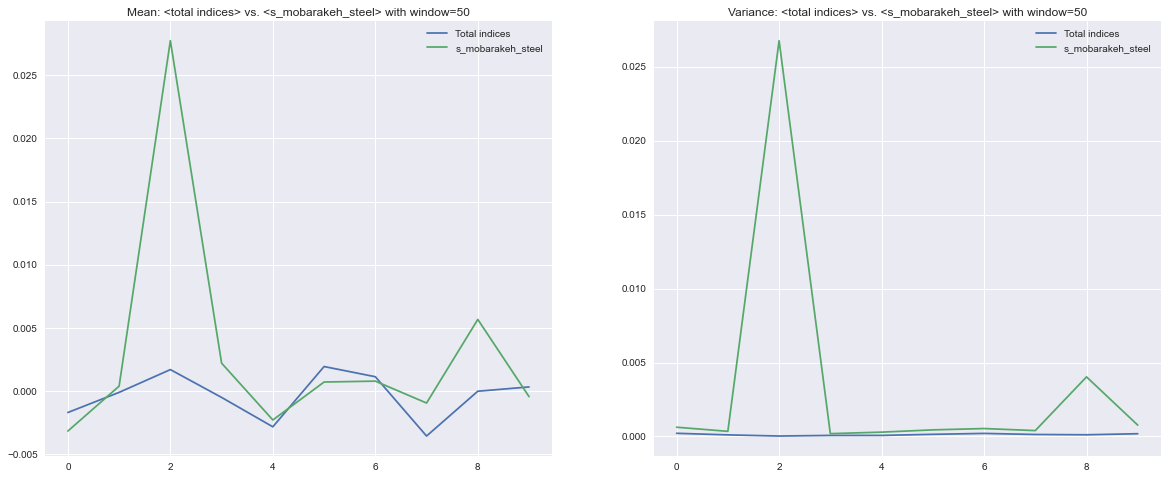

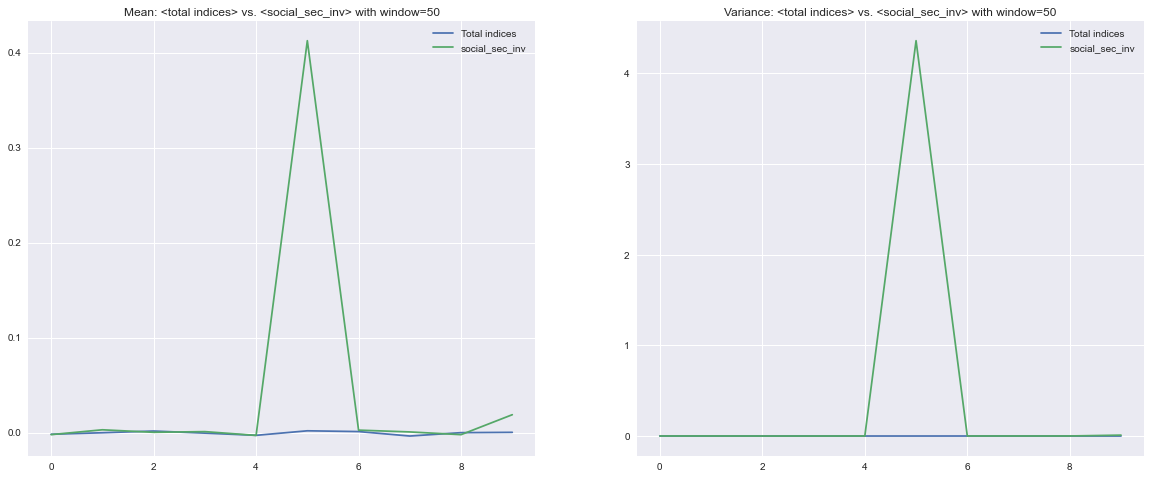

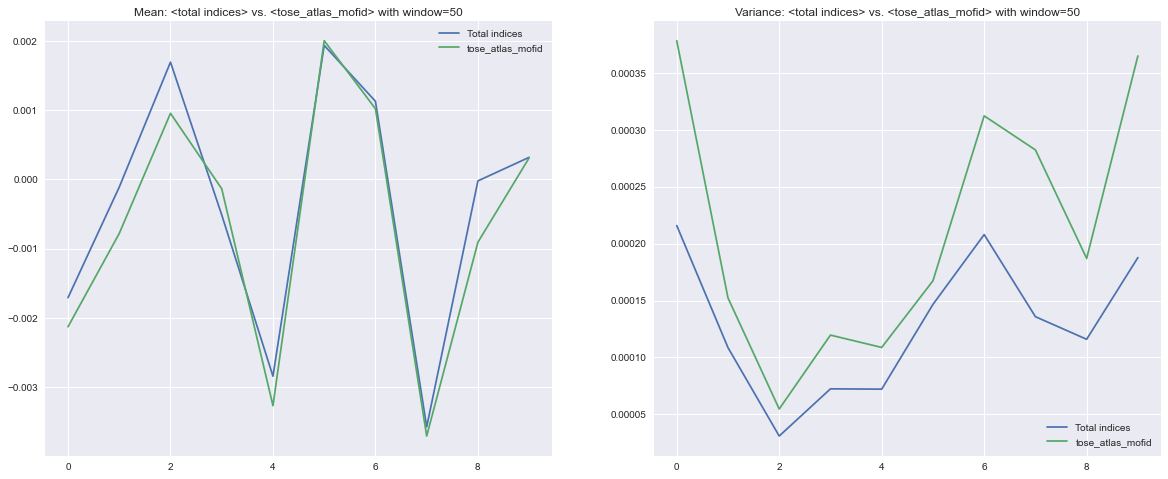

In [873]:
for i_window, (means, varss) in enumerate(zip(all_means_window, all_vars_window)):
    total_mean, total_var = means.pop(), varss.pop()
    for i_stock, (mean, var) in enumerate(zip(means, varss)):
        with plt.style.context('seaborn'):
            fig, ax = plt.subplots(1, 2, figsize=(20, 8))
            for i, (t, s, n, ax) in enumerate(zip([total_mean, total_var], [mean, var], ['Mean', 'Variance'], fig.axes)):
                ax.plot(t, label='Total indices')
                ax.plot(s, label=names[i_stock])
                ax.legend()
                ax.set_title('{}: <total indices> vs. <{}> with window={}'.format(n, names[i_stock], windows[i_window]))
            plt.show()

### Q 2.


#### 2.A.

In [794]:
lags = 5
autocorr = sm.tsa.acf(total_indices.loc[:, '<RETURN>'], nlags=lags)
for i in range(len(autocorr)):
    print('The autocorrelation at lag {} is {:.4f}'.format(i, autocorr[i]))

The autocorrelation at lag 0 is 1.0000
The autocorrelation at lag 1 is 0.3048
The autocorrelation at lag 2 is 0.0124
The autocorrelation at lag 3 is 0.1159
The autocorrelation at lag 4 is 0.0294
The autocorrelation at lag 5 is -0.0298


<Figure size 864x576 with 0 Axes>

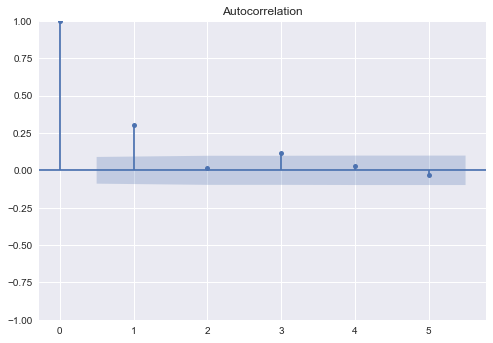

In [795]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(12, 8))
    tsaplots.plot_acf(total_indices.loc[:, '<RETURN>'], lags=lags)
    plt.show()

#### 2.B.

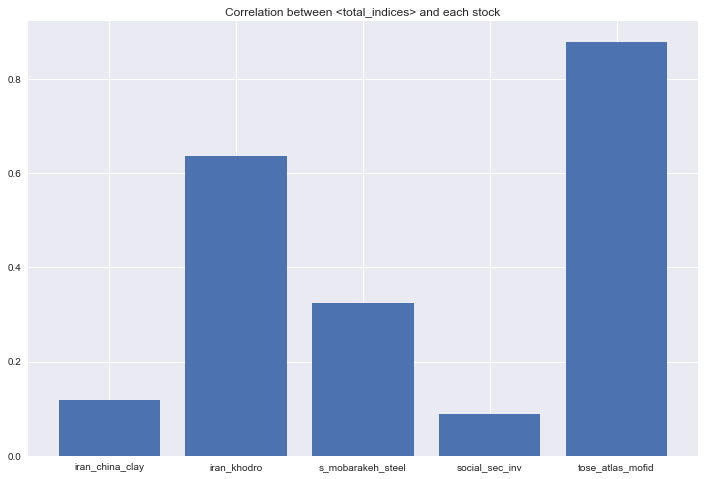

In [979]:
corrs = []
for stock in datasets[:-1]:
    temp = pd.merge(total_indices, stock,  how='left', left_on=['<DTYYYYMMDD>'], right_on = ['<DTYYYYMMDD>'])
    corrs.append(temp.loc[:, '<RETURN>_x'].corr(temp.loc[:, '<RETURN>_y']))
with plt.style.context('seaborn'):
    plt.figure(figsize=(12, 8))
    plt.bar(names[:-1], corrs)
    plt.title('Correlation between <total_indices> and each stock')
    plt.show()

In [ ]:
---------------------------------------------------------------------------------------------------------------------

In [32]:
# iran_china_clay_returns = cal_returns(iran_china_clay)
# iran_khodro_returns = cal_returns(iran_khodro)
# s_mobarakeh_steel_returns = cal_returns(s_mobarakeh_steel)
# social_sec_inv_returns = cal_returns(social_sec_inv)
# tose_atlas_mofid_returns = cal_returns(tose_atlas_mofid)

In [67]:
# def plotter(stock_returns, name):
#     with plt.style.context('seaborn'):
#         plt.figure(figsize=(10, 8))
#         plt.hist(stock_returns, bins=100)
#         plt.gca().set(title='Probability Histogram of <{}>'.format(name), ylabel='Frequency')
#         plt.show()

In [92]:
# plotter(iran_china_clay_returns, name='iran_china_clay')
# plotter(iran_khodro_returns, name='iran_khodro')
# plotter(s_mobarakeh_steel_returns, name='s_mobarakeh_steel')
# plotter(social_sec_inv_returns, name='social_sec_inv')
# plotter(tose_atlas_mofid_returns, name='tose_atlas_mofid')

### Lets ignore outliers to get a better view

In [93]:
# iran_china_clay_returns_no_outlier = [x for x in iran_china_clay_returns if x < 0.2]
# plotter(iran_china_clay_returns_no_outlier, name='iran_china_clay_returns_no_outlier')

In [94]:
# social_sec_inv_returns_no_outlier = [x for x in social_sec_inv_returns if x < 0.2]
# plotter(social_sec_inv_returns_no_outlier, name='social_sec_inv_returns_no_outlier')

In [95]:
# s_mobarakeh_steel_returns_no_outlier = [x for x in s_mobarakeh_steel_returns if x < 0.2]
# plotter(s_mobarakeh_steel_returns_no_outlier, name='s_mobarakeh_steel_returns_no_outlier')